In [1]:
#Data question, what types of crimes are the most prevalent in each borough?
#First step is to find a dataset that will provide detailed data that breaks out crimes committed per borough.
#Attempted to download the "Citywide Crime Statistic" dataset in NYC Open Data, but this dataset is housed on external NYPD website.
#Additionally, data is not available in CSV format and the data is summary data that does not break out types of crime per borough.
#Next option is "NYPD Complaints Data Historic". This dataset includes all valid felony, misdemeanor, and violation crimes reported to the NYPD 2006-2019


In [2]:
#Uploading tools
import seaborn as sns
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("https://data.cityofnewyork.us/resource/qgea-i56i.csv")

In [3]:
df.head()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,...,susp_sex,transit_district,latitude,longitude,lat_lon,patrol_boro,station_name,vic_age_group,vic_race,vic_sex
0,469069650,2019-09-04T00:00:00.000,09:00:00,2019-09-04T00:00:00.000,10:00:00,9.0,2019-09-04T00:00:00.000,341,PETIT LARCENY,321.0,...,NaN,NaN,40.724006,-73.980458,"(40.724005870000035, -73.98045825599996)",PATROL BORO MAN SOUTH,NaN,25-44,BLACK,F
1,629841380,2019-08-31T00:00:00.000,18:58:00,2019-08-31T00:00:00.000,19:03:00,50.0,2019-08-31T00:00:00.000,341,PETIT LARCENY,343.0,...,NaN,NaN,40.880458,-73.917685,"(40.88045772900006, -73.91768494199994)",PATROL BORO BRONX,NaN,45-64,UNKNOWN,M
2,918597562,2007-08-31T00:00:00.000,17:00:00,NaN,NaN,33.0,2007-09-04T00:00:00.000,107,BURGLARY,211.0,...,NaN,NaN,40.845118,-73.936809,"(40.845118059, -73.936808674)",PATROL BORO MAN NORTH,NaN,NaN,UNKNOWN,D
3,224389328,2019-09-07T00:00:00.000,22:00:00,2019-09-07T00:00:00.000,22:02:00,19.0,2019-09-07T00:00:00.000,341,PETIT LARCENY,333.0,...,M,NaN,40.762810,-73.962748,"(40.76280953700007, -73.96274775799998)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,D
4,303540290,2015-02-05T00:00:00.000,13:55:00,2015-02-05T00:00:00.000,14:20:00,79.0,2015-02-05T00:00:00.000,107,BURGLARY,231.0,...,U,NaN,40.679847,-73.939384,"(40.67984749, -73.939384473)",PATROL BORO BKLYN NORTH,NaN,NaN,UNKNOWN,D


In [4]:
df.shape

(1000, 35)

In [5]:
df.tail()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,...,susp_sex,transit_district,latitude,longitude,lat_lon,patrol_boro,station_name,vic_age_group,vic_race,vic_sex
995,923978623,2006-03-25T00:00:00.000,11:59:00,2006-03-25T00:00:00.000,12:05:00,40.0,2006-03-25T00:00:00.000,353,UNAUTHORIZED USE OF A VEHICLE,462.0,...,NaN,NaN,40.816054,-73.911944,"(40.816054438, -73.911944469)",PATROL BORO BRONX,NaN,NaN,UNKNOWN,F
996,420204154,2015-09-18T00:00:00.000,16:00:00,NaN,NaN,78.0,2015-09-18T00:00:00.000,105,ROBBERY,386.0,...,U,NaN,40.684061,-73.977459,"(40.68406075, -73.977459292)",PATROL BORO BKLYN SOUTH,NaN,<18,BLACK,F
997,241810112,2019-02-20T00:00:00.000,00:25:00,2019-02-20T00:00:00.000,00:28:00,52.0,2019-02-20T00:00:00.000,118,DANGEROUS WEAPONS,793.0,...,NaN,NaN,40.860198,-73.912211,"(40.86019783800003, -73.91221138699996)",PATROL BORO BRONX,NaN,45-64,UNKNOWN,M
998,330392236,2019-02-20T00:00:00.000,19:00:00,2019-02-21T00:00:00.000,00:18:00,83.0,2019-02-21T00:00:00.000,107,BURGLARY,223.0,...,M,NaN,40.687066,-73.909814,"(40.68706608200006, -73.90981432999997)",PATROL BORO BKLYN NORTH,NaN,25-44,WHITE,M
999,396095929,2019-02-23T00:00:00.000,08:44:00,NaN,NaN,52.0,2019-02-23T00:00:00.000,578,HARRASSMENT 2,637.0,...,M,NaN,40.863312,-73.891224,"(40.863311665000026, -73.89122401099996)",PATROL BORO BRONX,NaN,45-64,BLACK,F


In [6]:
#Dataset has 35 columms according to df.shape code. However, df.head and df.tail only display 20 column names.
#Will run df.columns to see all column names.
df.columns

Index(['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'cmplnt_to_dt',
       'cmplnt_to_tm', 'addr_pct_cd', 'rpt_dt', 'ky_cd', 'ofns_desc', 'pd_cd',
       'pd_desc', 'crm_atpt_cptd_cd', 'law_cat_cd', 'boro_nm',
       'loc_of_occur_desc', 'prem_typ_desc', 'juris_desc', 'jurisdiction_code',
       'parks_nm', 'hadevelopt', 'housing_psa', 'x_coord_cd', 'y_coord_cd',
       'susp_age_group', 'susp_race', 'susp_sex', 'transit_district',
       'latitude', 'longitude', 'lat_lon', 'patrol_boro', 'station_name',
       'vic_age_group', 'vic_race', 'vic_sex'],
      dtype='object')

In [7]:
#Based off of the initial data question, there are several columns that need to be dropped to facilitate a more impactful analysis of the data.
#Will use drop() function by creating drop_cols list of all columns that do not apply to current analysis.
drop_cols = ['addr_pct_cd', 'ky_cd', 'boro_nm','juris_desc', 'jurisdiction_code',
             'parks_nm', 'hadevelopt', 'housing_psa', 'x_coord_cd', 'y_coord_cd', 'transit_district', 
             'latitude', 'longitude', 'lat_lon', 'station_name',]
df.drop(drop_cols, inplace = True, axis=1)

In [8]:
#NYPD Complaint Historic Data dictionary was used to determine which columns would be useful in analysis. 

In [9]:
#Shape of dataset after columns were dropped
df.shape

(1000, 20)

In [10]:
df.head()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,rpt_dt,ofns_desc,pd_cd,pd_desc,crm_atpt_cptd_cd,law_cat_cd,loc_of_occur_desc,prem_typ_desc,susp_age_group,susp_race,susp_sex,patrol_boro,vic_age_group,vic_race,vic_sex
0,469069650,2019-09-04T00:00:00.000,09:00:00,2019-09-04T00:00:00.000,10:00:00,2019-09-04T00:00:00.000,PETIT LARCENY,321.0,"LARCENY,PETIT FROM AUTO",COMPLETED,MISDEMEANOR,REAR OF,NaN,NaN,NaN,NaN,PATROL BORO MAN SOUTH,25-44,BLACK,F
1,629841380,2019-08-31T00:00:00.000,18:58:00,2019-08-31T00:00:00.000,19:03:00,2019-08-31T00:00:00.000,PETIT LARCENY,343.0,"LARCENY,PETIT OF BICYCLE",COMPLETED,MISDEMEANOR,FRONT OF,STREET,NaN,NaN,NaN,PATROL BORO BRONX,45-64,UNKNOWN,M
2,918597562,2007-08-31T00:00:00.000,17:00:00,NaN,NaN,2007-09-04T00:00:00.000,BURGLARY,211.0,"BURGLARY,COMMERCIAL,DAY",COMPLETED,FELONY,INSIDE,DRUG STORE,NaN,NaN,NaN,PATROL BORO MAN NORTH,NaN,UNKNOWN,D
3,224389328,2019-09-07T00:00:00.000,22:00:00,2019-09-07T00:00:00.000,22:02:00,2019-09-07T00:00:00.000,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",COMPLETED,MISDEMEANOR,INSIDE,CHAIN STORE,UNKNOWN,BLACK,M,PATROL BORO MAN NORTH,UNKNOWN,UNKNOWN,D
4,303540290,2015-02-05T00:00:00.000,13:55:00,2015-02-05T00:00:00.000,14:20:00,2015-02-05T00:00:00.000,BURGLARY,231.0,"BURGLARY,TRUCK DAY",COMPLETED,FELONY,OPPOSITE OF,STREET,NaN,UNKNOWN,U,PATROL BORO BKLYN NORTH,NaN,UNKNOWN,D


In [11]:
df.tail()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,rpt_dt,ofns_desc,pd_cd,pd_desc,crm_atpt_cptd_cd,law_cat_cd,loc_of_occur_desc,prem_typ_desc,susp_age_group,susp_race,susp_sex,patrol_boro,vic_age_group,vic_race,vic_sex
995,923978623,2006-03-25T00:00:00.000,11:59:00,2006-03-25T00:00:00.000,12:05:00,2006-03-25T00:00:00.000,UNAUTHORIZED USE OF A VEHICLE,462.0,UNAUTHORIZED USE VEHICLE 3,COMPLETED,MISDEMEANOR,NaN,STREET,NaN,NaN,NaN,PATROL BORO BRONX,NaN,UNKNOWN,F
996,420204154,2015-09-18T00:00:00.000,16:00:00,NaN,NaN,2015-09-18T00:00:00.000,ROBBERY,386.0,"ROBBERY,PERSONAL ELECTRONIC DEVICE",COMPLETED,FELONY,NaN,STREET,UNKNOWN,UNKNOWN,U,PATROL BORO BKLYN SOUTH,<18,BLACK,F
997,241810112,2019-02-20T00:00:00.000,00:25:00,2019-02-20T00:00:00.000,00:28:00,2019-02-20T00:00:00.000,DANGEROUS WEAPONS,793.0,WEAPONS POSSESSION 3,COMPLETED,FELONY,FRONT OF,STREET,NaN,NaN,NaN,PATROL BORO BRONX,45-64,UNKNOWN,M
998,330392236,2019-02-20T00:00:00.000,19:00:00,2019-02-21T00:00:00.000,00:18:00,2019-02-21T00:00:00.000,BURGLARY,223.0,"BURGLARY,RESIDENCE,NIGHT",COMPLETED,FELONY,INSIDE,RESIDENCE-HOUSE,25-44,BLACK,M,PATROL BORO BKLYN NORTH,25-44,WHITE,M
999,396095929,2019-02-23T00:00:00.000,08:44:00,NaN,NaN,2019-02-23T00:00:00.000,HARRASSMENT 2,637.0,"HARASSMENT,SUBD 1,CIVILIAN",COMPLETED,VIOLATION,INSIDE,RESIDENCE - APT. HOUSE,UNKNOWN,UNKNOWN,M,PATROL BORO BRONX,45-64,BLACK,F


In [12]:
#After a quick look at the data via df.head and df.tail.
#columns cmplnt_to_dt (Ending date of occurrence) and cmplnt_to_tm (Ending time of occurrence) are not consistently available.
#and column cmplnt_fr_tm (Reported time of occurence) are not useful or necessary for this analysis.
#will drop these columns
drop_cols2 = ['cmplnt_fr_tm', 'cmplnt_to_dt', 'cmplnt_to_tm']
df.drop(drop_cols2, inplace = True, axis=1)

In [13]:
df.shape

(1000, 17)

In [14]:
df.head()

,cmplnt_num,cmplnt_fr_dt,rpt_dt,ofns_desc,pd_cd,pd_desc,crm_atpt_cptd_cd,law_cat_cd,loc_of_occur_desc,prem_typ_desc,susp_age_group,susp_race,susp_sex,patrol_boro,vic_age_group,vic_race,vic_sex
0,469069650,2019-09-04T00:00:00.000,2019-09-04T00:00:00.000,PETIT LARCENY,321.0,"LARCENY,PETIT FROM AUTO",COMPLETED,MISDEMEANOR,REAR OF,NaN,NaN,NaN,NaN,PATROL BORO MAN SOUTH,25-44,BLACK,F
1,629841380,2019-08-31T00:00:00.000,2019-08-31T00:00:00.000,PETIT LARCENY,343.0,"LARCENY,PETIT OF BICYCLE",COMPLETED,MISDEMEANOR,FRONT OF,STREET,NaN,NaN,NaN,PATROL BORO BRONX,45-64,UNKNOWN,M
2,918597562,2007-08-31T00:00:00.000,2007-09-04T00:00:00.000,BURGLARY,211.0,"BURGLARY,COMMERCIAL,DAY",COMPLETED,FELONY,INSIDE,DRUG STORE,NaN,NaN,NaN,PATROL BORO MAN NORTH,NaN,UNKNOWN,D
3,224389328,2019-09-07T00:00:00.000,2019-09-07T00:00:00.000,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",COMPLETED,MISDEMEANOR,INSIDE,CHAIN STORE,UNKNOWN,BLACK,M,PATROL BORO MAN NORTH,UNKNOWN,UNKNOWN,D
4,303540290,2015-02-05T00:00:00.000,2015-02-05T00:00:00.000,BURGLARY,231.0,"BURGLARY,TRUCK DAY",COMPLETED,FELONY,OPPOSITE OF,STREET,NaN,UNKNOWN,U,PATROL BORO BKLYN NORTH,NaN,UNKNOWN,D


In [15]:
#to create consistency in the dataset and make it easier to interpret, we will replace the null values ('NaN') into "Unknown".
df.fillna('UNKNOWN', inplace=True)

In [16]:
df.head()

,cmplnt_num,cmplnt_fr_dt,rpt_dt,ofns_desc,pd_cd,pd_desc,crm_atpt_cptd_cd,law_cat_cd,loc_of_occur_desc,prem_typ_desc,susp_age_group,susp_race,susp_sex,patrol_boro,vic_age_group,vic_race,vic_sex
0,469069650,2019-09-04T00:00:00.000,2019-09-04T00:00:00.000,PETIT LARCENY,321.0,"LARCENY,PETIT FROM AUTO",COMPLETED,MISDEMEANOR,REAR OF,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,PATROL BORO MAN SOUTH,25-44,BLACK,F
1,629841380,2019-08-31T00:00:00.000,2019-08-31T00:00:00.000,PETIT LARCENY,343.0,"LARCENY,PETIT OF BICYCLE",COMPLETED,MISDEMEANOR,FRONT OF,STREET,UNKNOWN,UNKNOWN,UNKNOWN,PATROL BORO BRONX,45-64,UNKNOWN,M
2,918597562,2007-08-31T00:00:00.000,2007-09-04T00:00:00.000,BURGLARY,211.0,"BURGLARY,COMMERCIAL,DAY",COMPLETED,FELONY,INSIDE,DRUG STORE,UNKNOWN,UNKNOWN,UNKNOWN,PATROL BORO MAN NORTH,UNKNOWN,UNKNOWN,D
3,224389328,2019-09-07T00:00:00.000,2019-09-07T00:00:00.000,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",COMPLETED,MISDEMEANOR,INSIDE,CHAIN STORE,UNKNOWN,BLACK,M,PATROL BORO MAN NORTH,UNKNOWN,UNKNOWN,D
4,303540290,2015-02-05T00:00:00.000,2015-02-05T00:00:00.000,BURGLARY,231.0,"BURGLARY,TRUCK DAY",COMPLETED,FELONY,OPPOSITE OF,STREET,UNKNOWN,UNKNOWN,U,PATROL BORO BKLYN NORTH,UNKNOWN,UNKNOWN,D


In [45]:
#Now we want to observe what offense is most prevalent in each borough, in order to do this we are going to create a visualization.
#The visualization will display a breakdown of the ofns_desc and the patrol_boro.
#First, let's take a look at the aggregated data for ofns_desc column using groupby() function
df.groupby(['ofns_desc'])['patrol_boro'].count()

ofns_desc
ADMINISTRATIVE CODE                  1
ARSON                               13
ASSAULT 3 & RELATED OFFENSES        63
BURGLAR'S TOOLS                      1
BURGLARY                            47
CRIMINAL MISCHIEF & RELATED OF      25
CRIMINAL TRESPASS                    8
DANGEROUS DRUGS                    123
DANGEROUS WEAPONS                   59
FELONY ASSAULT                      44
FORGERY                             31
FRAUDS                              12
FRAUDULENT ACCOSTING                 1
GAMBLING                             1
GRAND LARCENY                       49
GRAND LARCENY OF MOTOR VEHICLE      11
HARRASSMENT 2                      133
INTOXICATED & IMPAIRED DRIVING       2
MISCELLANEOUS PENAL LAW             18
MURDER & NON-NEGL. MANSLAUGHTER     28
OFF. AGNST PUB ORD SENSBLTY &        6
OFFENSES AGAINST PUBLIC ADMINI       6
OFFENSES AGAINST THE PERSON          2
OFFENSES INVOLVING FRAUD             4
OTHER STATE LAWS (NON PENAL LA       1
PETIT LARCENY  

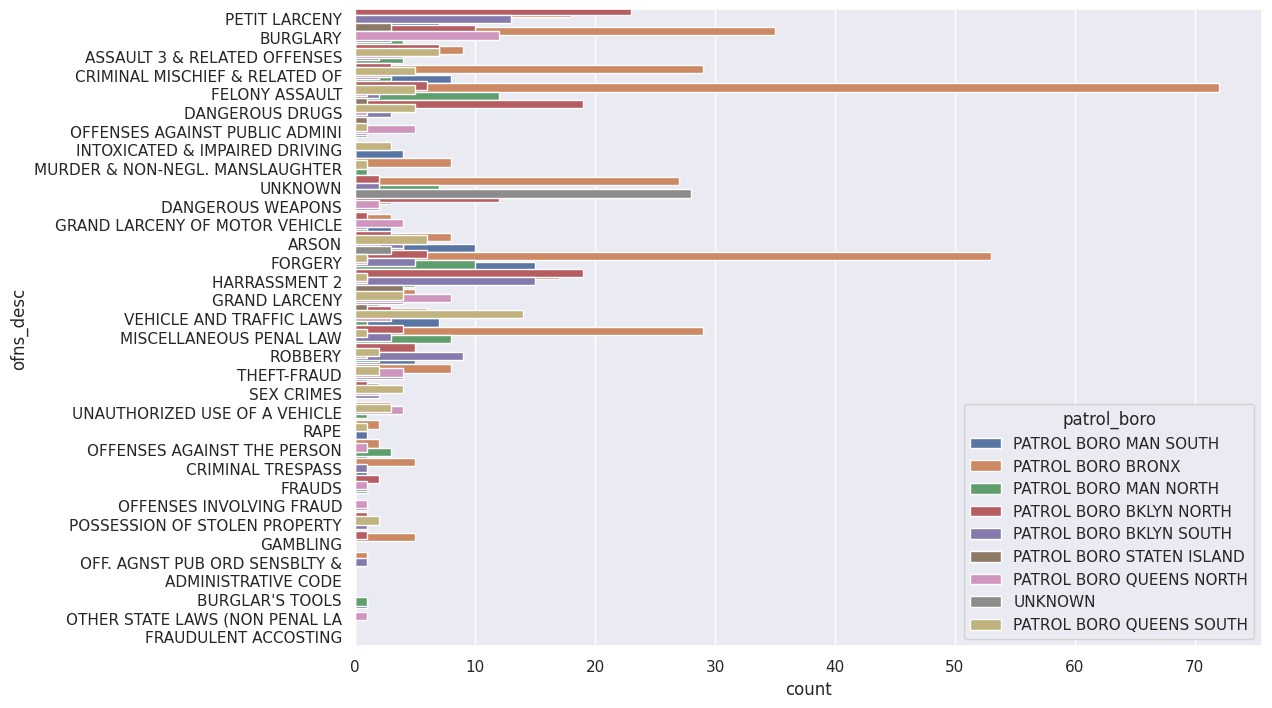

In [51]:
sns.countplot(y="ofns_desc",
 data=df, width=4, 
 hue="patrol_boro")
sns.set(rc={'figure.figsize':(11.7,8.27)})

According to NYC Opendata website, this dataset displays "all valid felony, misdemeanor, and violation crimes reported to the New York City Police Department (NYPD) from 2006 to the end of 2019" with a sample of 1000 of these records comprising the data that's been analyzed. 

Although there is some crowding in the count plot, represented by a bar chart, it is still possible to see the outliers, or the highest number of offenses, for each borough (patrol_boro) based on the hue of each bar. Ofns_desc, plotted on the y-axis, represents the description of the offense reported. The x-axis represents the count of each offense.

According to the count plot, the following offenses are most reported in each borough:
- The Bronx: "Criminal mischief & related of" 
- Brooklyn: "Petit Larceny"  
- Manhattan: "Felony Assault"
- Queens: "Vehicle and Traffic Laws"
- Staten Island: "Burglary"